# Segmentation of TIF image files using squidpy

This workflow is designed to demonstrate image segmentation for Visium analysis 
using the [squidpy (Palla, Spitzer et al., 2022)](https://doi.org/10.1038/s41592-021-01358-2) package.
Refer to the following resources for technical details:

- [Squidpy documentation](https://squidpy.readthedocs.io/en/stable/index.html)
- [Tutorial: Analyze Visium fluorescence data](https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_visium_fluo.html)
- [Squidpy GitHub](https://github.com/scverse/squidpy)

## Installing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import squidpy as sq
from tifffile import imread
import napari
import os

/Users/sohnm/Documents/squidpy_masking/env/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/sohnm/Documents/squidpy_masking/env/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/Users/sohnm/Documents/squidpy_masking/env/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  return modu

## Configuration

In [3]:
# ------------------------------------------------------------------------------
# This chunk is used to specify variables for paths to input files/directories
# and parameter settings
# ------------------------------------------------------------------------------

# reticulate::repl_python()

# Specify input image file
input_image = "image_conversion/converted_169.ome.tif"

# Specify argument setting for printing images
channel_config = {
    'Merged' : {'ch' : None, 'cm' : None},
    'Channel 0' : {'ch' : 0, 'cm' : 'gray'},
    'Channel 1' : {'ch' : 1, 'cm' : 'gray'},
    'Channel 2' : {'ch' : 2, 'cm' : 'gray'},
    'Channel 3' : {'ch' : 3, 'cm' : 'gray'},
    'Channel 4' : {'ch' : 4, 'cm' : 'gray'}
}

# Specify the name of input image layer to be processed
lyr = 'image'

# Specify signal values to be tested for Gaussian smoothing
# Sigma represents the variance for normal distribution
gaussian_sigma = 1

# Specify coordinates to crop images
crop_coord = {'height' : 10000, 'width' : 10000, 'size' : 10000, 'scale' : 1}

# Specify the segmentation method
seg_method = "watershed"

# Specify the thresholding method. If `None`, the Otsu method is used.
thr_method = None

## Loading input images

We use `tif` image files converted from `vsi`. Refer to the [image_conversion.html](image_conversion.html) 
for detailed processes on converting image formats.

The following image object loaded:

In [4]:
# ------------------------------------------------------------------------------
# This chunk is used to load input image files
# ------------------------------------------------------------------------------

# Read image as numpy array
img_array = imread(input_image)

# Initialize ImageContainer
img = sq.im.ImageContainer(img_array, layer=lyr)

print(img)

ImageContainer[shape=(33872, 33874), layers=['image']]


In [5]:
cropped = img.crop_corner(x=crop_coord['width'],
                          y=crop_coord['height'],
                          size=crop_coord['size'],
                          scale=crop_coord['scale'])
print(cropped)

ImageContainer[shape=(10000, 10000), layers=['image']]


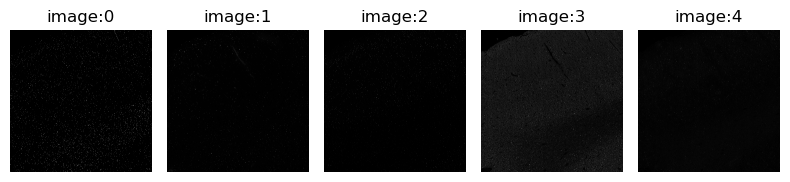

In [6]:
# ------------------------------------------------------------------------------
# This chunk prints all input images at once
# ------------------------------------------------------------------------------


# Specify plotting arguments
rows = 3
cols = 2

# Initialize subplots
# fig, axes = plt.subplots(nrows=rows, ncols=cols)

cropped.show("image", channel=None, cmap="gray")